In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Softmax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
train_dir = os.path.join('images', 'train')
valid_dir = os.path.join('images', 'validation')

train_point_up_dir = os.path.join(train_dir, 'point_up')
train_point_foreward_dir = os.path.join(train_dir, 'point_foreward')

valid_point_up_dir = os.path.join(valid_dir, 'point_up')
valid_point_foreward_dir = os.path.join(valid_dir, 'point_foreward')

In [5]:
num_point_up_train = len(os.listdir(train_point_up_dir))
num_point_foreward_train = len(os.listdir(train_point_foreward_dir))

num_point_up_valid = len(os.listdir(valid_point_up_dir))
num_point_foreward_valid = len(os.listdir(valid_point_foreward_dir))

total_train = num_point_up_train + num_point_foreward_train
total_valid = num_point_up_valid + num_point_foreward_valid

In [6]:
print("Total training images:", total_train)
print("Total validation images:", total_valid)

Total training images: 423
Total validation images: 52


In [7]:
batch_size = 128
epochs = 2
HEIGHT = 75
WIDTH = 75

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)
valid_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(HEIGHT, WIDTH),
    class_mode='binary'
)

Found 423 images belonging to 2 classes.


In [10]:
valid_data_gen = valid_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=valid_dir,
    target_size=(HEIGHT, WIDTH),
    class_mode='binary'
)

Found 52 images belonging to 2 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

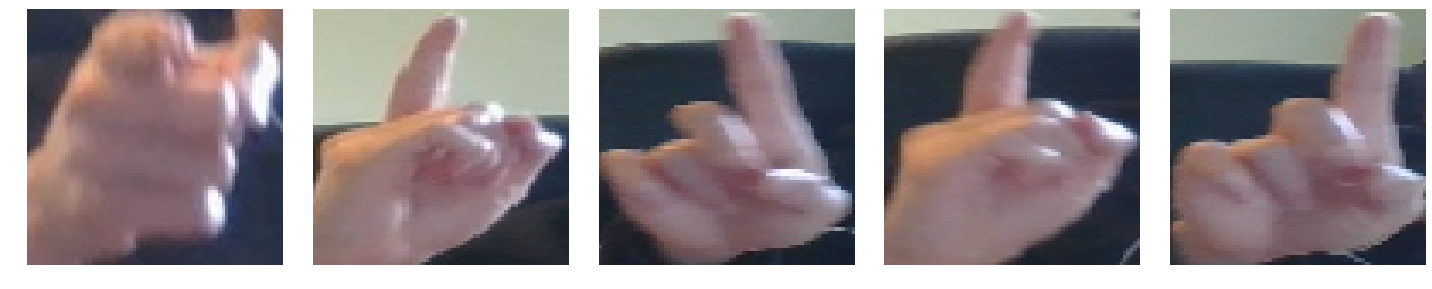

In [13]:
plotImages(sample_training_images[:5])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(2),
    Softmax()
])

# model = Sequential([
#     Flatten(input_shape=(HEIGHT, WIDTH, 3)),
#     Dense(128, activation='relu'),
#     Dense(2),
#     Softmax()
# ])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=valid_data_gen,
    validation_steps=total_valid
)

Epoch 1/2
423/423 [==============================] - 350s 826ms/step - loss: 0.3174 - accuracy: 0.9954 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 2/2
423/423 [==============================] - 373s 882ms/step - loss: 0.3133 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000


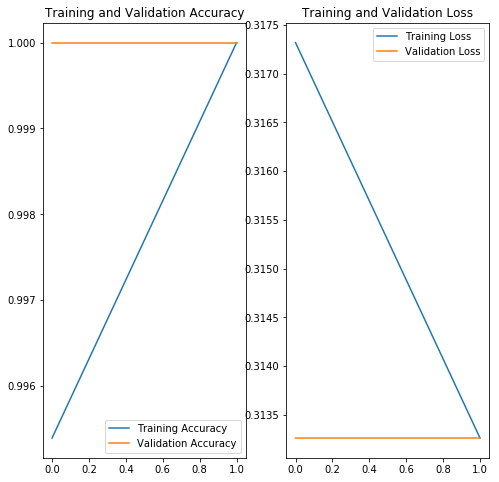

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

['img101.jpg', 'img11.jpg', 'img121.jpg', 'img124.jpg', 'img155.jpg', 'img156.jpg', 'img176.jpg', 'img181.jpg', 'img19.jpg', 'img202.jpg', 'img210.jpg', 'img231.jpg', 'img233.jpg', 'img24.jpg', 'img242.jpg', 'img25.jpg', 'img250.jpg', 'img267.jpg', 'img3.jpg', 'img37.jpg', 'img39.jpg', 'img4.jpg', 'img42.jpg', 'img6.jpg', 'img60.jpg', 'img62.jpg', 'img98.jpg']


In [30]:
test_dir = 'test'
files = os.listdir(test_dir)
# print(files)
for f in files:
    img = cv2.imread(os.path.join(test_dir, f))
    img = cv2.resize(img, (HEIGHT, WIDTH))
    batch = np.expand_dims(img, axis=0).astype(np.float32)
    res = model.predict(batch)
    print(res)

[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]
[[0. 1.]]


array([[1., 0.]], dtype=float32)